##**Name of team members** - Kashish Garg

#**<center>Project -Amazon Product Review Analysis</center>**


**Company Overview**


> The year was 1994 when Jeff Bezos launched Amazon from his garage. In 1995, the first product launched by Amazon was a book in 50 states and in 45 countries within 30 days. (Oberlo 2021)

> Within 26 years, Amazon became the world's large online retailer and a household name. The Amazon name has become synonymous with online shopping and continues to grow by developing new products, acquisitions, and numerous service offerings to enlarge the customer base

> Nowadays, almost 150.6 million people turn to the Amazon app for most everything. Several types of research have proven that customers trust Amazon. (Statista 2019) On average, the small and medium-sized businesses located in the USA sell more than 4,000 items per minute (Amazon 2019), which leads to millions of product reviews on Amazon.




.




**Business Objective**


> Reviews tell which products and features are trending, what's in demand, what's no longer relevant, how products and competitors are doing, and much more.

>Survey results show that positive product reviews are a key factor for purchasing by 57 percent of Amazon buyers. (Statista, 2019).As product reviews are often the deciding factor for many customers, it's very important to have a well-automated system for monitoring them.

>Develop an automated system to analyze and monitor an enormous number of reviews. By monitoring the entire review history, we will analyze- 
*   Tone, language, keywords,
*   and trends over time to provide valuable insights that increase the success rate of existing and new products and marketing campaigns.


**Project Outcome-**

---

*   **Inventory Management and Demand Forecasting -**

 Optimize inventory management by identifying the product categories (clustering as an outcome of text processing) on the customer review data. Predict what kind of products could be in demand (Time Series Analysis).



*   **Customer Retention and Sentiment Forecasting**

 Customer retention strategy through feedback analysis (customer classification and clustering as an outcome of analyzing the review text). Trend and seasonality analysis to predict how frequently a particular category of customer would shop in the future. (Time Series Analysis)


*   **Time Series component:**

 Trend, Seasonality Analysis to predict how frequently this the customer would buy new products.








 



.




### **DataSet Milestones**


*   **Data Preperation** -Text and Data preprocessing,EDA
*   **Sentiment Analysis** -Natural language Understanding,Information Extraction,Sentiment Analysis

*   **Classification and Clustering** - Feature Extraction,Scaling,Encoding

      Finding best suitable model

*   **Sentiment Time Series Forecasting** - Data Preprocessing for time series model with Data Visualisation


*   **Final Presenttion** - Finding the Perfect solution for business requirement and help in future predictions.










---

## **Data Preperation**


---





#### **Mounting google drive to Fetch required Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Importing necessary libraries and package for Analysis**


In [ ]:
# importing the libraries related to the data manipulation.
import numpy as np
import pandas as pd
import json
import string

# importing the libraries related to the data_visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# TextBlob is a Python library for processing textual data.
from textblob import TextBlob

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading <mark> Kindle Review </mark> Json Data**

In [ ]:
data = [json.loads(line) for line in open("/content/drive/MyDrive/Data science project kkk/Kindle_Store_5.json", 'r')]


**Converting Json Kindle Review Data to Dataframe**

In [ ]:
df_kindel_store_review=pd.DataFrame(data)

**Extracting first 5 rows of kindle Review Dataset**

In [ ]:
df_kindel_store_review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014"
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014"
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014"
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014"
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014"


**Shape of Kindle Dataset**

In [ ]:
df_kindel_store_review.shape

(982619, 9)

**Info of Kindle Dataset**

In [ ]:
df_kindel_store_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982619 entries, 0 to 982618
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      982619 non-null  object 
 1   asin            982619 non-null  object 
 2   reviewerName    978820 non-null  object 
 3   helpful         982619 non-null  object 
 4   reviewText      982619 non-null  object 
 5   overall         982619 non-null  float64
 6   summary         982619 non-null  object 
 7   unixReviewTime  982619 non-null  int64  
 8   reviewTime      982619 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 67.5+ MB


**Observations**
*   We have Kindle review data in Json format which we loaded and converted into dataframe to work
*   Kindle review data has 982619 rows and 9 columns 
*   All columns are object ones except for overall and unixReviewTime
*   Mainly focused columns are 'asin,reviewText,overall and reviewTime'






###**Loading <mark> Kindle META  </mark>  Json. Review Data**

In [ ]:
data1 = [json.dumps(line) for line in open("/content/drive/MyDrive/Data science project kkk/meta_Kindle_Store.json", 'r')]

**Converting Json Kindle META Data to Dataframe**

In [ ]:
df_meta_kindel=pd.DataFrame(data1)

**Extracting first 5 rows of Kindle META Dataset**

In [ ]:
df_meta_kindel.head()

,0
0,"""{'asin': '1603420304', 'description': \""In le..."
1,"""{'asin': 'B0002IQ15S', 'categories': [['Kindl..."
2,"""{'asin': 'B000F83SZQ', 'price': 0.0, 'imUrl':..."
3,"""{'asin': 'B000F83TEQ', 'imUrl': 'http://ecx.i..."
4,"""{'asin': 'B000F83STC', 'imUrl': 'http://g-ecx..."


In [ ]:
df_meta_kindel['1']=df_meta_kindel[0].apply(lambda x:x.split('{}'))

In [ ]:
df_meta_kindel.columns

Index([0, '1'], dtype='object')

**Observations** 


*   Kindle meta data is in the text format,we have to split it and then make it in usable format
*   All columns are not needed,except for price one


*   But Kindle data has no price as it works on suubscription
*   So our kindle meta data is of not much use ,we can avoid using this data





### **Loading <mark> Kindle Rating </mark>Json Data**

In [ ]:
df_kindel_store=pd.read_csv('/content/drive/MyDrive/Data science project kkk/amazon project/ratings_Kindle_Store.csv',header=None)

**Extracting first 5 rows of Kindle Rating Dataset**

In [ ]:
df_kindel_store.head()

,0,1,2,3
0,A2GZ9GFZV1LWB0,1603420304,4.0,1405209600
1,A1K7VSUDCVAPW8,1603420304,3.0,1282176000
2,A35J5XRE5ZT6H2,1603420304,4.0,1365206400
3,A3DGZNFSMNWSX5,1603420304,4.0,1285632000
4,A2CVDQ6H36L4VL,1603420304,5.0,1342396800


**Renaming the unnamed Kindle store rating data columns**

In [ ]:
df_kindel_store.rename(columns = {0:'reviewerID', 2:'Ratings'}, inplace = True)

**Observations** 

*   Kindle Ratins data has 4 columns which mainly consist reviewerID and Ratings only
*   These columns dont have any name so we renamed them as respective

The ratings and reviewerID column in Kindle Ratings data is same as reviewerID and Overall in kindle review data,
So there is everything that we need in our kindle review data we can also  avoid using Kindle Ratings data
```
So our focused Data is Kindle Review data
```




## **Data Understanding**

###**First five rows of the Kindle review data** 

In [ ]:
df_kindel_store_review.head()          

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014"
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014"
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014"
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014"
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014"


**Extracting the <mark> Year </mark> from reviewtime column**

In [ ]:
# Extracting the only year from reviewtime column 
df_kindel_store_review['year']=df_kindel_store_review['reviewTime'].apply(lambda x:x.split(',')[1])

**Checking for missing / null values**

In [ ]:
df_kindel_store_review.isnull().sum()   # checking for sum of missing value in each column

reviewerID           0
asin                 0
reviewerName      3799
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
year                 0
dtype: int64

**Droping the missing value**

In [ ]:
df_kindel_store_review.dropna(inplace=True)    

**Information about the given dataFrame**

In [ ]:
# Find the `information about the given dataFrame` including the index dtype and column dtypes, non-null values and memory usage.
df_kindel_store_review.info() 

**Columns in our dataset**

In [ ]:
df_kindel_store_review.columns    

**Converting year into int data type**

In [ ]:
df_kindel_store_review['year'].astype('int')

**Fetching the unique years from the data**

In [ ]:
df_kindel_store_review['year'].unique()

**Observations**
*  Kindle Review contains 982619 rows and 9 columns
*   We have to extract year from reviewTime coloumn and amke it a seperate column converting it to int
*   We checked for null values and got 3799 as null values
*   These null values account for only 0.4% of values,so we dropped these null values
*   Our data contains columns such as 'reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText','overall', 'summary', 'unixReviewTime', 'reviewTime'




##**Data Preprocessing**

**Sentiment Analysis**

We Have to do Sentiment Analysis of the Data to make it more appropriate and  to analyze customer feedback, responses, and product reviews

Our interest is to do a analysis on reviewText column

In [ ]:
pd.options.mode.chained_assignment = None
df = df_kindel_store_review[["reviewText"]]
df["reviewText"] = df["reviewText"].astype(str)        # converting the review text column to strind datatype
df=df[:10000]                                          # extratcting the first 1 lakh observations 

**Observation** 
*   Doing Sentiment Analysis of all data is difficult
*   So we are taking top 10000 reviews and will do the sentiment on that




**1. Lowercasing the text of review_text:**

In [ ]:
df["lowercase_text"] = df["reviewText"].str.lower()   # lowering the text 
df.head()

,reviewText,lowercase_text
0,I enjoy vintage books and movies so I enjoyed ...,i enjoy vintage books and movies so i enjoyed ...
1,This book is a reissue of an old one; the auth...,this book is a reissue of an old one; the auth...
2,This was a fairly interesting read. It had ol...,this was a fairly interesting read. it had ol...
3,I'd never read any of the Amy Brewster mysteri...,i'd never read any of the amy brewster mysteri...
4,"If you like period pieces - clothing, lingo, y...","if you like period pieces - clothing, lingo, y..."


**2. Removal of punctuations present in the text:**

In [ ]:
Punctuation_remove = string.punctuation
def remove_punctuation(lowercase_text):                    # defining the function
    """custom function to remove the punctuation"""
    return lowercase_text.translate(str.maketrans('', '', Punctuation_remove))

df["NoPunctuations_text"] = df["lowercase_text"].apply(lambda lowercase_text: remove_punctuation(lowercase_text))
df.head()

,reviewText,lowercase_text,NoPunctuations_text
0,I enjoy vintage books and movies so I enjoyed ...,i enjoy vintage books and movies so i enjoyed ...,i enjoy vintage books and movies so i enjoyed ...
1,This book is a reissue of an old one; the auth...,this book is a reissue of an old one; the auth...,this book is a reissue of an old one the autho...
2,This was a fairly interesting read. It had ol...,this was a fairly interesting read. it had ol...,this was a fairly interesting read it had old...
3,I'd never read any of the Amy Brewster mysteri...,i'd never read any of the amy brewster mysteri...,id never read any of the amy brewster mysterie...
4,"If you like period pieces - clothing, lingo, y...","if you like period pieces - clothing, lingo, y...",if you like period pieces clothing lingo you ...


**3. Removal of stopwords:**

In [ ]:
# importing the NLP library
import nltk
from nltk.corpus import stopwords
stopwords

<WordListCorpusReader in '.../corpora/stopwords' (not loaded yet)>

In [ ]:
nltk.download('stopwords')            # downloading the stopwords 
stopwords = nltk.corpus.stopwords.words('english')      # extracting the stopwords from english language 
print(stopwords)                      # printing the stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):            # defining the function to removre stopwords
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopwords])  # combining all the review and removing the stopwords

df["Nostopwords_text"] = df["NoPunctuations_text"].apply(lambda text: remove_stopwords(text))  # applying on column 
df.head()

,reviewText,lowercase_text,NoPunctuations_text,Nostopwords_text
0,I enjoy vintage books and movies so I enjoyed ...,i enjoy vintage books and movies so i enjoyed ...,i enjoy vintage books and movies so i enjoyed ...,enjoy vintage books movies enjoyed reading boo...
1,This book is a reissue of an old one; the auth...,this book is a reissue of an old one; the auth...,this book is a reissue of an old one the autho...,book reissue old one author born 1910 era say ...
2,This was a fairly interesting read. It had ol...,this was a fairly interesting read. it had ol...,this was a fairly interesting read it had old...,fairly interesting read old style terminologyi...
3,I'd never read any of the Amy Brewster mysteri...,i'd never read any of the amy brewster mysteri...,id never read any of the amy brewster mysterie...,id never read amy brewster mysteries one reall...
4,"If you like period pieces - clothing, lingo, y...","if you like period pieces - clothing, lingo, y...",if you like period pieces clothing lingo you ...,like period pieces clothing lingo enjoy myster...


**4. Removal of Frequent words:**

In [ ]:
from collections import Counter                 # importing the counter package 
cnt = Counter()              
for text in df["Nostopwords_text"].values:        # defining the loop for nonstopwords columnn 
    for word in text.split():                     # spliting the words  
        cnt[word] += 1                            # initilizing the count 
        
cnt.most_common(10)                               # printint the coumn words in the review 

[('book', 9607),
 ('story', 7561),
 ('read', 6866),
 ('one', 4864),
 ('like', 3684),
 ('love', 3548),
 ('good', 3513),
 ('characters', 3461),
 ('would', 3000),
 ('really', 2874)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])          # storing the top ten column in a variable 
def remove_freqwords(text):                                      # defining the function 
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])  # combining all the review and removing the frequent words 

df["NoFreqwords_text"] = df["Nostopwords_text"].apply(lambda text: remove_freqwords(text))    # applying to all column
df.head()

,reviewText,lowercase_text,NoPunctuations_text,Nostopwords_text,NoFreqwords_text
0,I enjoy vintage books and movies so I enjoyed ...,i enjoy vintage books and movies so i enjoyed ...,i enjoy vintage books and movies so i enjoyed ...,enjoy vintage books movies enjoyed reading boo...,enjoy vintage books movies enjoyed reading plo...
1,This book is a reissue of an old one; the auth...,this book is a reissue of an old one; the auth...,this book is a reissue of an old one the autho...,book reissue old one author born 1910 era say ...,reissue old author born 1910 era say nero wolf...
2,This was a fairly interesting read. It had ol...,this was a fairly interesting read. it had ol...,this was a fairly interesting read it had old...,fairly interesting read old style terminologyi...,fairly interesting old style terminologyi glad...
3,I'd never read any of the Amy Brewster mysteri...,i'd never read any of the amy brewster mysteri...,id never read any of the amy brewster mysterie...,id never read amy brewster mysteries one reall...,id never amy brewster mysteries hooked
4,"If you like period pieces - clothing, lingo, y...","if you like period pieces - clothing, lingo, y...",if you like period pieces clothing lingo you ...,like period pieces clothing lingo enjoy myster...,period pieces clothing lingo enjoy mystery aut...


**5. Stemming:**

In [ ]:
from nltk.stem.porter import PorterStemmer          # importing the porterstemer library

# Drop the four columns 
df.drop(["lowercase_text", "NoPunctuations_text","Nostopwords_text"], axis=1, inplace=True)  # droping the column 

stemmer = PorterStemmer()
def stem_words(NoFreqwords_text):                    # defining the function 
    return " ".join([stemmer.stem(word) for word in NoFreqwords_text.split()])

df["Stemmed_text"] = df["NoFreqwords_text"].apply(lambda NoFreqwords_text: stem_words(NoFreqwords_text))
df.head()

,reviewText,NoFreqwords_text,Stemmed_text
0,I enjoy vintage books and movies so I enjoyed ...,enjoy vintage books movies enjoyed reading plo...,enjoy vintag book movi enjoy read plot unusu d...
1,This book is a reissue of an old one; the auth...,reissue old author born 1910 era say nero wolf...,reissu old author born 1910 era say nero wolf ...
2,This was a fairly interesting read. It had ol...,fairly interesting old style terminologyi glad...,fairli interest old style terminologyi glad ge...
3,I'd never read any of the Amy Brewster mysteri...,id never amy brewster mysteries hooked,id never ami brewster mysteri hook
4,"If you like period pieces - clothing, lingo, y...",period pieces clothing lingo enjoy mystery aut...,period piec cloth lingo enjoy mysteri author g...


**6. Lemmetisation**

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(Stemmed_text):
    return " ".join([lemmatizer.lemmatize(word) for word in Stemmed_text.split()])

df["Lemmatized_text"] = df["Stemmed_text"].apply(lambda Stemmed_text: lemmatize_words(Stemmed_text))
df.head()

,reviewText,NoFreqwords_text,Stemmed_text,Lemmatized_text
0,I enjoy vintage books and movies so I enjoyed ...,enjoy vintage books movies enjoyed reading plo...,enjoy vintag book movi enjoy read plot unusu d...,enjoy vintag book movi enjoy read plot unusu d...
1,This book is a reissue of an old one; the auth...,reissue old author born 1910 era say nero wolf...,reissu old author born 1910 era say nero wolf ...,reissu old author born 1910 era say nero wolf ...
2,This was a fairly interesting read. It had ol...,fairly interesting old style terminologyi glad...,fairli interest old style terminologyi glad ge...,fairli interest old style terminologyi glad ge...
3,I'd never read any of the Amy Brewster mysteri...,id never amy brewster mysteries hooked,id never ami brewster mysteri hook,id never ami brewster mysteri hook
4,"If you like period pieces - clothing, lingo, y...",period pieces clothing lingo enjoy mystery aut...,period piec cloth lingo enjoy mysteri author g...,period piec cloth lingo enjoy mysteri author g...


**7. Removings of URLs, if there are no emojis and emoticons**

In [ ]:
# importing regular expression
import re
def remove_urls(Lemmatized_text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', Lemmatized_text)

df["URL_removed_text"] = df["Lemmatized_text"].apply(lambda Lemmatized_text: remove_urls(Lemmatized_text))
df.head()

,reviewText,NoFreqwords_text,Stemmed_text,Lemmatized_text,URL_removed_text
0,I enjoy vintage books and movies so I enjoyed ...,enjoy vintage books movies enjoyed reading plo...,enjoy vintag book movi enjoy read plot unusu d...,enjoy vintag book movi enjoy read plot unusu d...,enjoy vintag book movi enjoy read plot unusu d...
1,This book is a reissue of an old one; the auth...,reissue old author born 1910 era say nero wolf...,reissu old author born 1910 era say nero wolf ...,reissu old author born 1910 era say nero wolf ...,reissu old author born 1910 era say nero wolf ...
2,This was a fairly interesting read. It had ol...,fairly interesting old style terminologyi glad...,fairli interest old style terminologyi glad ge...,fairli interest old style terminologyi glad ge...,fairli interest old style terminologyi glad ge...
3,I'd never read any of the Amy Brewster mysteri...,id never amy brewster mysteries hooked,id never ami brewster mysteri hook,id never ami brewster mysteri hook,id never ami brewster mysteri hook
4,"If you like period pieces - clothing, lingo, y...",period pieces clothing lingo enjoy mystery aut...,period piec cloth lingo enjoy mysteri author g...,period piec cloth lingo enjoy mysteri author g...,period piec cloth lingo enjoy mysteri author g...


**8. Removing of tags:**

In [ ]:
def remove_html(URL_removed_text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', URL_removed_text)

df["Tags_Removed_text"] = df["URL_removed_text"].apply(lambda URL_removed_text: remove_html(URL_removed_text))
df.head()

,reviewText,NoFreqwords_text,Stemmed_text,Lemmatized_text,URL_removed_text,Tags_Removed_text
0,I enjoy vintage books and movies so I enjoyed ...,enjoy vintage books movies enjoyed reading plo...,enjoy vintag book movi enjoy read plot unusu d...,enjoy vintag book movi enjoy read plot unusu d...,enjoy vintag book movi enjoy read plot unusu d...,enjoy vintag book movi enjoy read plot unusu d...
1,This book is a reissue of an old one; the auth...,reissue old author born 1910 era say nero wolf...,reissu old author born 1910 era say nero wolf ...,reissu old author born 1910 era say nero wolf ...,reissu old author born 1910 era say nero wolf ...,reissu old author born 1910 era say nero wolf ...
2,This was a fairly interesting read. It had ol...,fairly interesting old style terminologyi glad...,fairli interest old style terminologyi glad ge...,fairli interest old style terminologyi glad ge...,fairli interest old style terminologyi glad ge...,fairli interest old style terminologyi glad ge...
3,I'd never read any of the Amy Brewster mysteri...,id never amy brewster mysteries hooked,id never ami brewster mysteri hook,id never ami brewster mysteri hook,id never ami brewster mysteri hook,id never ami brewster mysteri hook
4,"If you like period pieces - clothing, lingo, y...",period pieces clothing lingo enjoy mystery aut...,period piec cloth lingo enjoy mysteri author g...,period piec cloth lingo enjoy mysteri author g...,period piec cloth lingo enjoy mysteri author g...,period piec cloth lingo enjoy mysteri author g...


In [ ]:
df.drop(["Stemmed_text", "Lemmatized_text", "URL_removed_text"], axis=1, inplace=True)
df.head()

,reviewText,NoFreqwords_text,Tags_Removed_text
0,I enjoy vintage books and movies so I enjoyed ...,enjoy vintage books movies enjoyed reading plo...,enjoy vintag book movi enjoy read plot unusu d...
1,This book is a reissue of an old one; the auth...,reissue old author born 1910 era say nero wolf...,reissu old author born 1910 era say nero wolf ...
2,This was a fairly interesting read. It had ol...,fairly interesting old style terminologyi glad...,fairli interest old style terminologyi glad ge...
3,I'd never read any of the Amy Brewster mysteri...,id never amy brewster mysteries hooked,id never ami brewster mysteri hook
4,"If you like period pieces - clothing, lingo, y...",period pieces clothing lingo enjoy mystery aut...,period piec cloth lingo enjoy mysteri author g...


In [ ]:
df.drop(['NoFreqwords_text'],axis=1,inplace=True)

In [ ]:
df.head()

,reviewText,Tags_Removed_text
0,I enjoy vintage books and movies so I enjoyed ...,enjoy vintag book movi enjoy read plot unusu d...
1,This book is a reissue of an old one; the auth...,reissu old author born 1910 era say nero wolf ...
2,This was a fairly interesting read. It had ol...,fairli interest old style terminologyi glad ge...
3,I'd never read any of the Amy Brewster mysteri...,id never ami brewster mysteri hook
4,"If you like period pieces - clothing, lingo, y...",period piec cloth lingo enjoy mysteri author g...


**Observations:**
*   Firstly we lowercased our data to bring all our text in one order and then removed punctuation marks if there is any
*   We removed stop words means the words that are not so much useful in our data,also the most frequent words
*  Performed Stemming and Lemmetisation to converts the word to its meaningful base form,

 Out of these two Lemmetisation performed in better way so we used Lemmetisation on our data

*   In the end removal of URLS and Tags were done to make our data more clean and understandable
*   Dropped all oher Unnecessary columns and kept only the resulted column namely 'Tags removed text'








##**Exploratory Data Analysis**

**Importing Visualisation Libraries**

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")

###**Can we estimate the count of each ratings?**

<Axes: xlabel='overall', ylabel='count'>

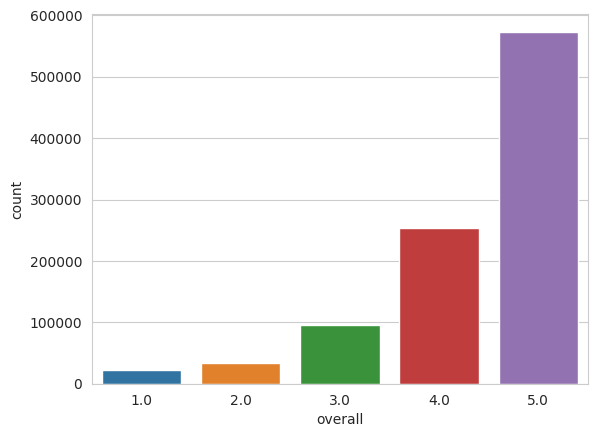

In [ ]:
sns.countplot(x='overall',data=df_kindel_store_review)

###**Box plot to visualise where most of the ratings lies**

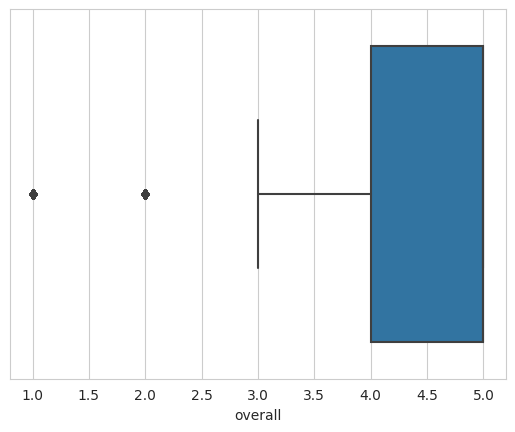

In [ ]:
sns.boxplot(x='overall',data=df_kindel_store_review)
plt.show()

###**What are the most Frequently used /Occuring words in the reviews?**

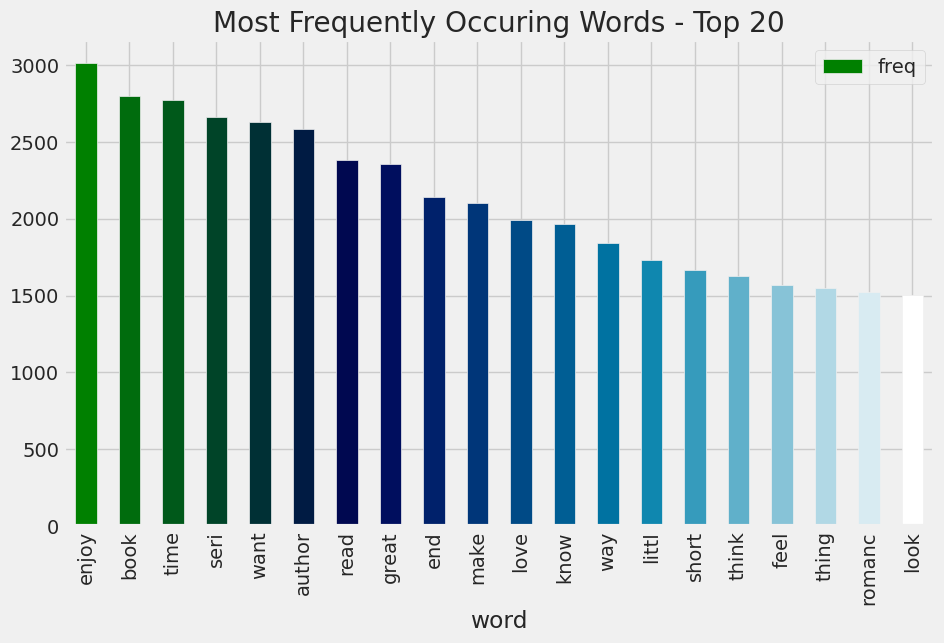

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Tags_Removed_text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(10, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

### **Lets show the Wordscloud** 


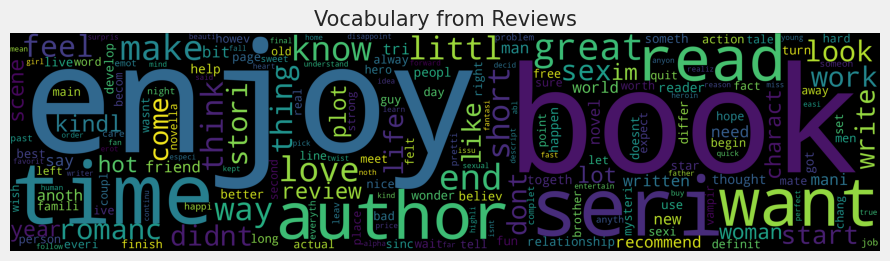

In [ ]:
from wordcloud import WordCloud
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Tags_Removed_text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 4000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 15)
plt.show()

###**Lets see the impact of emotions on our reviews**

In [ ]:
happy=df_kindel_store_review[df_kindel_store_review['reviewText'].str.contains('enjoy')]
fun=df_kindel_store_review[df_kindel_store_review['reviewText'].str.contains('fun')]
sad=df_kindel_store_review[df_kindel_store_review['reviewText'].str.contains('issu')]
worst=df_kindel_store_review[df_kindel_store_review['reviewText'].str.contains('worst')]
old=df_kindel_store_review[df_kindel_store_review['reviewText'].str.contains('old')]
realiz=df_kindel_store_review[df_kindel_store_review['reviewText'].str.contains('realiz')]

believ=df_kindel_store_review[df_kindel_store_review['reviewText'].str.contains('believ')]
recommend=df_kindel_store_review[df_kindel_store_review['reviewText'].str.contains('recommend')]
relationship=df_kindel_store_review[df_kindel_store_review['reviewText'].str.contains('relationship')]

In [ ]:
sad=pd.concat([sad,worst],axis=0)

In [ ]:
happy=pd.concat([happy,fun],axis=0)

In [ ]:
anger=pd.concat([old,realiz],axis=0)

In [ ]:
loyal=pd.concat([believ,recommend,relationship],axis=0)

In [ ]:
happy.shape

(303159, 10)

In [ ]:
sad.shape

(41832, 10)

In [ ]:
anger.shape

(154787, 10)

In [ ]:
loyal.shape

(261755, 10)

In [ ]:
print(anger['overall'].mean())
print(sad['overall'].mean())
print(loyal['overall'].mean())
print(happy['overall'].mean())

4.309231395401422
4.117350353796137
4.397363947202536
4.368044491504458


### **Top 10 products which user expresses their emotions**

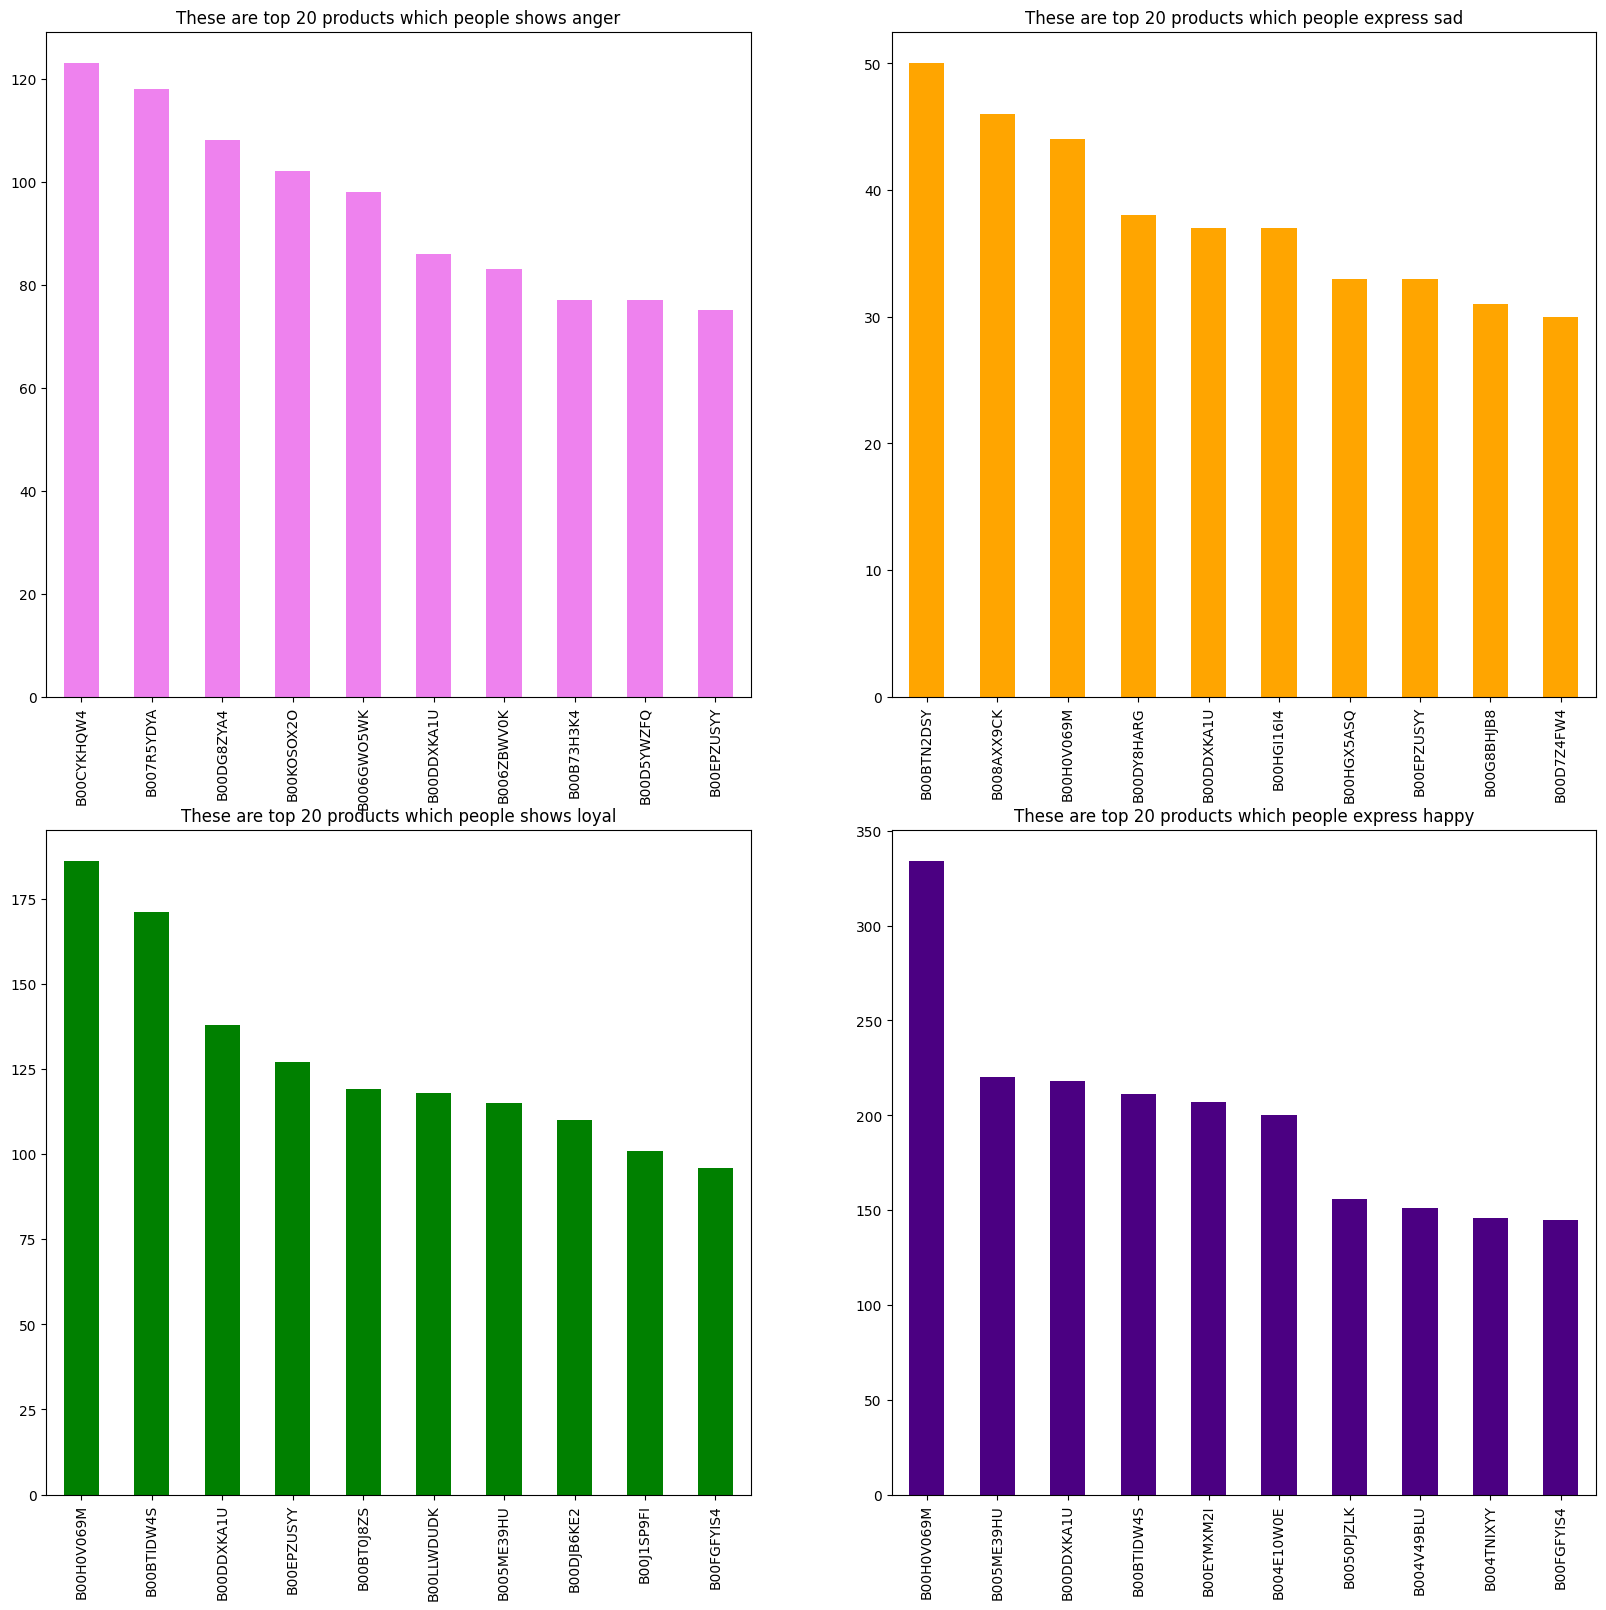

In [ ]:
plt.figure(figsize=(20,19))
plt.xlabel('product Id')
plt.ylabel('Count')
plt.subplot(2,2,1)
anger['asin'].value_counts()[:10].plot(kind='bar',color='violet')
plt.title('These are top 20 products which people shows anger')
plt.subplot(2,2,2)
sad['asin'].value_counts()[:10].plot(kind='bar',color='orange')
plt.title('These are top 20 products which people express sad')
plt.subplot(2,2,3)
loyal['asin'].value_counts()[:10].plot(kind='bar',color='green')
plt.title('These are top 20 products which people shows loyal')
plt.subplot(2,2,4)
happy['asin'].value_counts()[:10].plot(kind='bar',color='indigo')
plt.title('These are top 20 products which people express happy')
plt.show()

###**What's the Overall Trend of Ratings from 2008 to 2014**

In [ ]:
five=df_kindel_store_review[df_kindel_store_review['overall']==5]
four=df_kindel_store_review[df_kindel_store_review['overall']==4]
three=df_kindel_store_review[df_kindel_store_review['overall']==3]
two=df_kindel_store_review[df_kindel_store_review['overall']==2]
one=df_kindel_store_review[df_kindel_store_review['overall']==1]

Text(0.5, 0, 'Year')

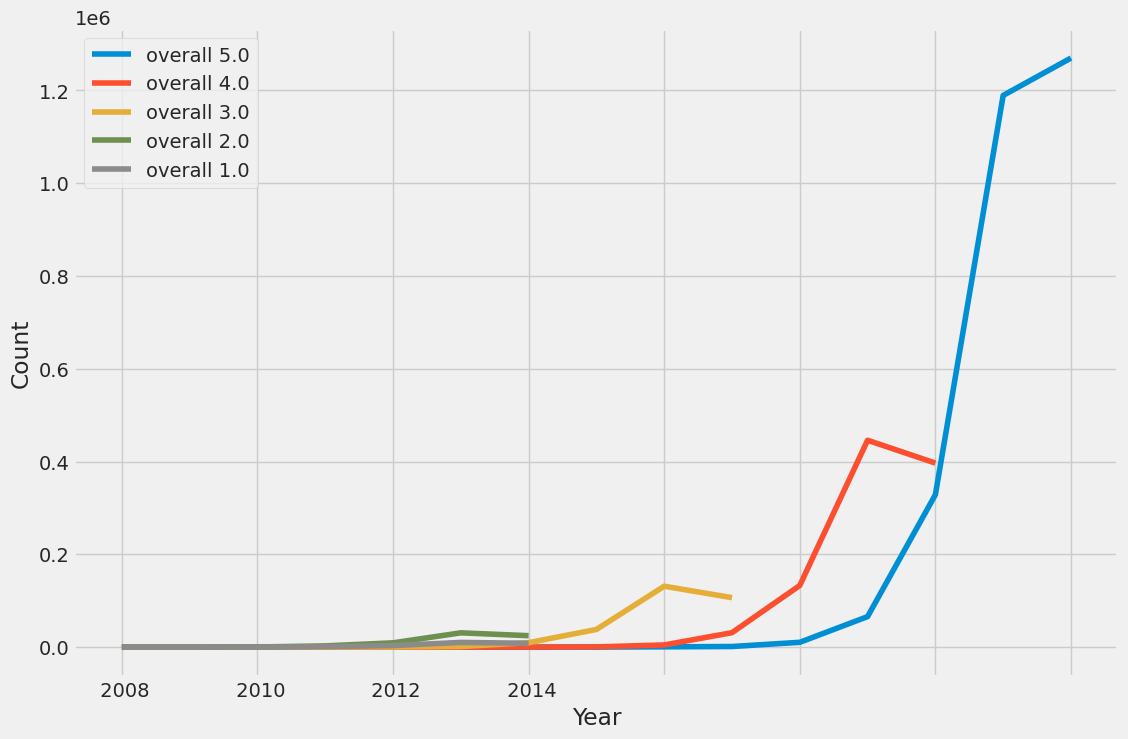

In [ ]:
plt.figure(figsize=(12,8))
five.groupby('year')['overall'].sum().plot(kind='line',label='overall 5.0')
four.groupby('year')['overall'].sum().plot(kind='line',label='overall 4.0')
three.groupby('year')['overall'].sum().plot(kind='line',label='overall 3.0')
two.groupby('year')['overall'].sum().plot(kind='line',label='overall 2.0')
one.groupby('year')['overall'].sum().plot(kind='line',label='overall 1.0')
plt.legend()


plt.ylabel('Count')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

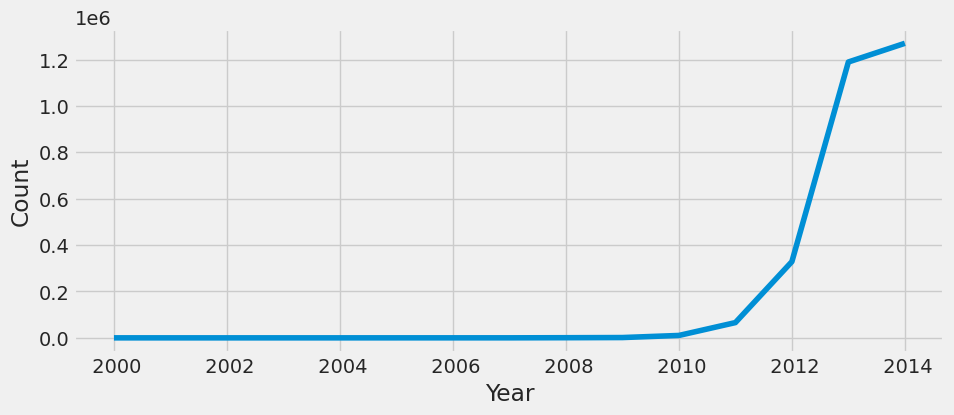

In [ ]:
plt.figure(figsize=(10,4))
five.groupby('year')['overall'].sum().plot(kind='line')
plt.ylabel('Count')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

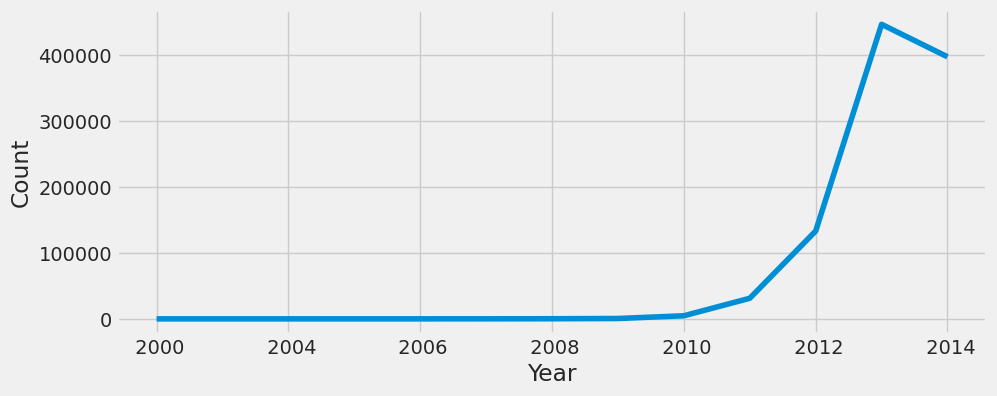

In [ ]:
plt.figure(figsize=(10,4))
four.groupby('year')['overall'].sum().plot(kind='line')
plt.ylabel('Count')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

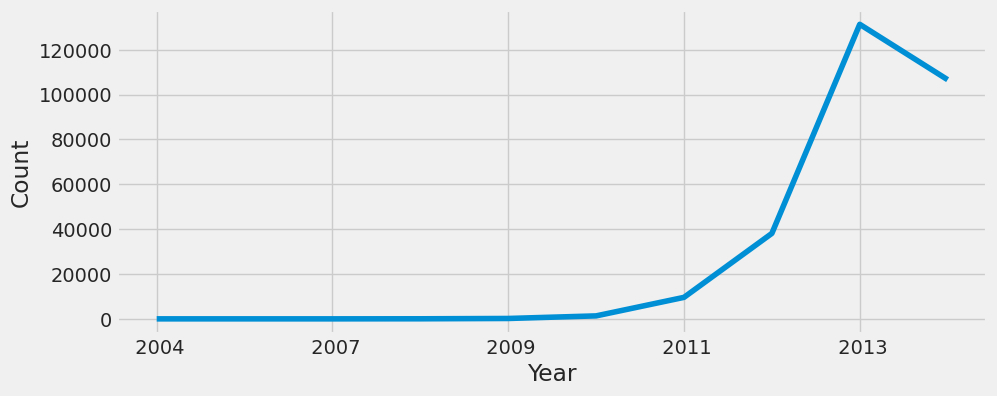

In [ ]:
plt.figure(figsize=(10,4))
three.groupby('year')['overall'].sum().plot(kind='line')
plt.ylabel('Count')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

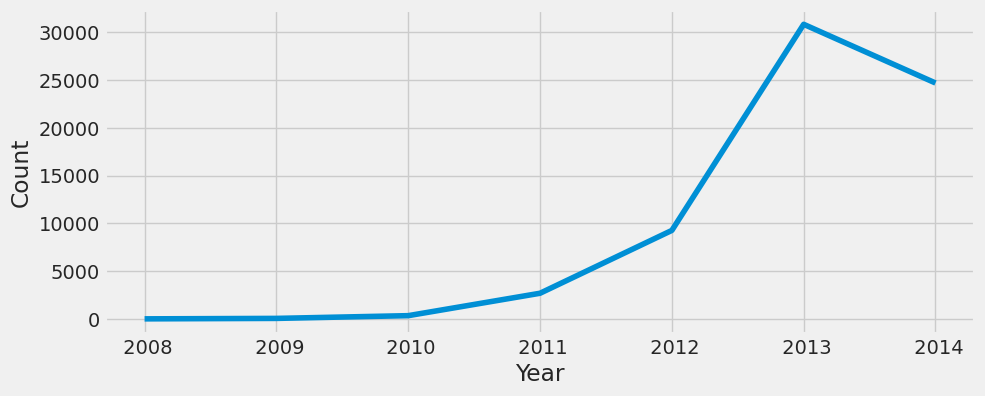

In [ ]:
plt.figure(figsize=(10,4))
two.groupby('year')['overall'].sum().plot(kind='line')
plt.ylabel('Count')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

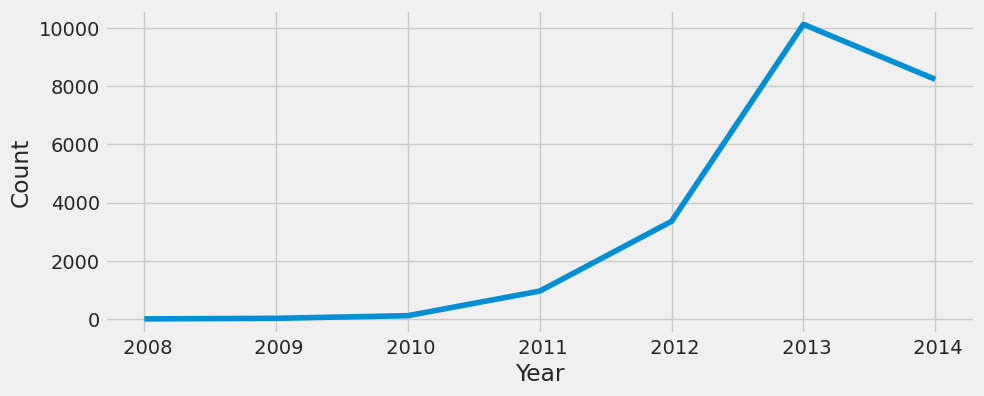

In [ ]:
plt.figure(figsize=(10,4))
one.groupby('year')['overall'].sum().plot(kind='line')
plt.ylabel('Count')
plt.xlabel('Year')

###**Getting the Top 10 products with average Rating**

In [ ]:
top_products=df_kindel_store_review['asin'].value_counts()[:10]

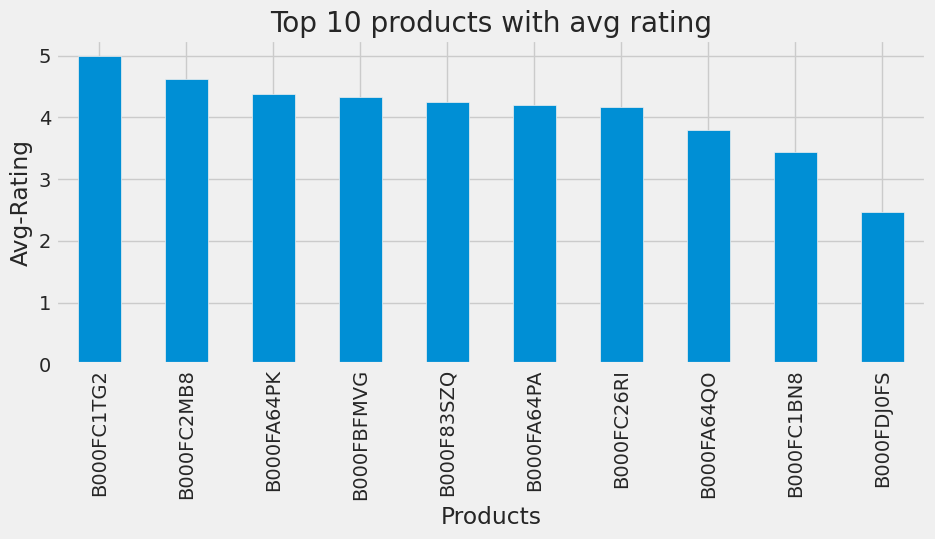

In [ ]:
plt.figure(figsize=(10,4))
df_kindel_store_review.groupby('asin')['overall'].mean()[:10].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Avg-Rating')
plt.title('Top 10 products with avg rating')
plt.show()

**Observations:**

In the EDA section we start building graphs to represent the insights and answers to the questions that business demands

*   Firstly we plotted the estimated counts of each rating which shows **5 star rating are the highest while the 1 star ratings are lowest** which shows a positive impact

*   Box plot graph shows us that majority of ratings lies in **4 and 5 rating** 
*   AFter that the bar graph shows the top 20 most frequently used words in reviews in which **Enjoy** was used maximum times


*   Wordcloud shows us the most commonly used words in a fun and more convinient way to read


*   The emotions that customer shows towards the products we have divided it in 4 parts -**happy anger sad and loyal emotions** ,and accordingly we have fetched top 20 products in that each emotion category

*   Trend of Rating over years 2008-2014 shows us that 5 star rating has drastically increased followed by 4 sart and 3 star ratings

*   In the end we have plotted the top 10 products that have average ratings








## **Text Preprocessing and Model Building**

**Estimating Polarity ,Subjectivity and Analsis Labels for our text Review data**

In [ ]:
from textblob import TextBlob

def getSubjectivity(Tags_Removed_text):
    return TextBlob(Tags_Removed_text).sentiment.subjectivity
    
def getPolarity(Tags_Removed_text):
    return TextBlob(Tags_Removed_text).sentiment.polarity

df ['polarity'] = df['Tags_Removed_text'].apply(getPolarity)
df['subjectivity'] = df['Tags_Removed_text'].apply(getSubjectivity)

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis_labels'] = df['polarity'].apply(lambda x: getAnalysis(x))

In [ ]:
df

,reviewText,Tags_Removed_text,polarity,subjectivity,Analysis_labels
0,I enjoy vintage books and movies so I enjoyed ...,enjoy vintag book movi enjoy read plot unusu d...,0.400000,0.500000,Positive
1,This book is a reissue of an old one; the auth...,reissu old author born 1910 era say nero wolf ...,0.200000,0.150000,Positive
2,This was a fairly interesting read. It had ol...,fairli interest old style terminologyi glad ge...,0.100000,0.616667,Positive
3,I'd never read any of the Amy Brewster mysteri...,id never ami brewster mysteri hook,0.000000,0.000000,Neutral
4,"If you like period pieces - clothing, lingo, y...",period piec cloth lingo enjoy mysteri author g...,0.050000,0.450000,Positive
...,...,...,...,...,...
10025,"Indigo Spell is a fairly quick, not unpleasant...",indigo spell fairli quick unpleas your look st...,0.128846,0.474145,Positive
10026,4.5 CocktailsThis book is number five in the W...,45 cocktailsthi number five western wind seri ...,0.093822,0.410689,Positive
10027,"I enjoyed the entire series of the Reapers, wo...",enjoy entir seri reaper highli recommend found...,0.133333,0.300000,Positive
10028,GREAT series. Very different and interesting. ...,great seri differ interest enjoy book written ...,0.400000,0.416667,Positive


**Observations:**

Using Text preprocessing we have estimated polarity ,subjectivity and Analysis labels for our review column

*   Polarity lies between -1 to 1 where -
```
polarity < 0 shows negative analysis
polarity = 0  shows Neutral analysis
polarity > 0  shows Positive analysis```

*  SUbjectivity lies between 0 to 1 and shows the strenght of emotions that review data has




###**Splitting the Data into Test and Train**

We are splitting our data in ratio of 80:20 raio with random state 0 
So that we can use 80% data to train our model and do testing on 20 % of our data




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df['Tags_Removed_text'],
                                                 df['Analysis_labels'],
                                                 test_size = 0.2,random_state = 0)

In [ ]:
X_train.shape

(8000,)

In [ ]:
X_test.shape

(2000,)

In [ ]:
df['Analysis_labels'].value_counts()

Positive    7953
Negative    1213
Neutral      834
Name: Analysis_labels, dtype: int64

**Observations:**


*   Our Train data has 8000 rows while test data has 2000 rows/values
*   Out of the total Analysis ,we can see that
```
7953 reviews have Positive polarity/feedback
1213 reviews have Negative polarity/feedback
While 834 are Neutral ones
 ```





In [ ]:
# The data seems to be imbalanced  we need to solve this problem 

In [ ]:
x=df['Tags_Removed_text']

In [ ]:
x

0        enjoy vintag book movi enjoy read plot unusu d...
1        reissu old author born 1910 era say nero wolf ...
2        fairli interest old style terminologyi glad ge...
3                       id never ami brewster mysteri hook
4        period piec cloth lingo enjoy mysteri author g...
                               ...                        
10025    indigo spell fairli quick unpleas your look st...
10026    45 cocktailsthi number five western wind seri ...
10027    enjoy entir seri reaper highli recommend found...
10028    great seri differ interest enjoy book written ...
10029    happi get bevyn sinc happen well written could...
Name: Tags_Removed_text, Length: 10000, dtype: object

In [ ]:
y=df['Analysis_labels']

In [ ]:
vect1 = TfidfVectorizer()
X = vect1.fit_transform(x)

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn import over_sampling

In [ ]:
from imblearn.over_sampling import  RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[('Negative', 7953), ('Neutral', 7953), ('Positive', 7953)] (23859,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size = 0.2,random_state = 0)

In [ ]:
y_resampled.value_counts()

Positive    7953
Neutral     7953
Negative    7953
Name: Analysis_labels, dtype: int64

### **Feature Extraction**
**Converting text data into respective numbers by TFID vectorizer**

In [ ]:
# importing the library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [ ]:
vect1 = TfidfVectorizer()
cv_train = vect1.fit_transform(X_train)
cv_test = vect1.transform(X_test)

###**Using classification to build different Supervised models**

**1). KNN Classifier:**


In [ ]:
#import KNN classifer and fit on the Training dataset
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Accuracy score on training dataset
model1.score(X_train,y_train)

0.6628071462251794

In [ ]:
# Accuracy on Test dataset
model1.score(X_test,y_test)

0.6309723386420788

In [ ]:
# Performing prediction on Test dataset
expected = y_test
predicted = model1.predict(X_test)

In [ ]:
# plot confusion matrix for the test dataset
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sb

Text(21.78333333333333, 0.5, 'predicted')

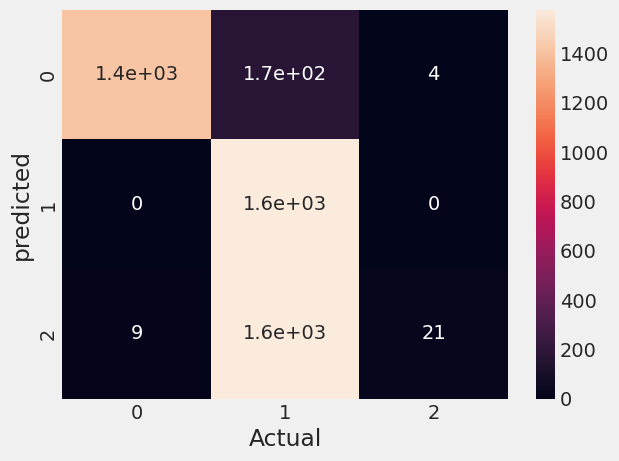

In [ ]:
cm=confusion_matrix(expected,predicted)
sb.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [ ]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

    Negative       0.99      0.89      0.94      1589
     Neutral       0.47      1.00      0.64      1577
    Positive       0.84      0.01      0.03      1606

    accuracy                           0.63      4772
   macro avg       0.77      0.63      0.54      4772
weighted avg       0.77      0.63      0.53      4772



**Observations:**

KNN Model gets Training Accuracy of 82.9
while Testing Accuracy of 76.2

Out of 2000 oservations-
1588 were positive 
256 were negative and 
156 were neautral

**2). Navie bais Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model2=MultinomialNB()

In [ ]:
model2.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# Accuracy score on training dataset
model2.score(X_train,y_train)

0.9380730340022004

In [ ]:
# Accuracy on Test dataset
model2.score(X_test,y_test)

0.8973176865046102

In [ ]:
# Performing prediction on Test dataset
expected = y_test
predicted = model2.predict(X_test)

Text(21.78333333333333, 0.5, 'predicted')

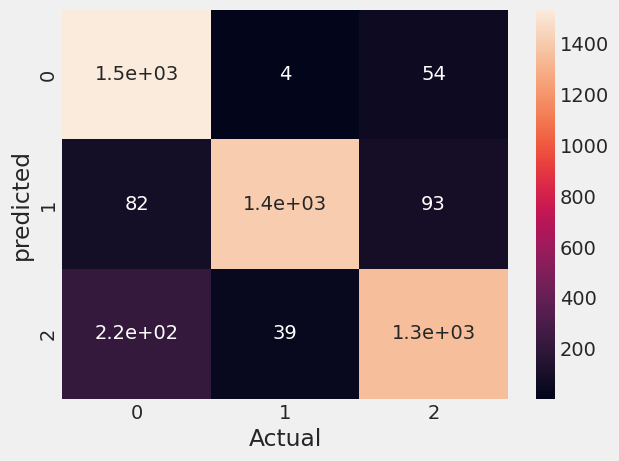

In [ ]:
cm=confusion_matrix(expected,predicted)
sb.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [ ]:
print(classification_report(expected,predicted))

              precision    recall  f1-score   support

    Negative       0.84      0.96      0.90      1589
     Neutral       0.97      0.89      0.93      1577
    Positive       0.90      0.84      0.87      1606

    accuracy                           0.90      4772
   macro avg       0.90      0.90      0.90      4772
weighted avg       0.90      0.90      0.90      4772



**Observations:**

Naive Bais Model gets Training Accuracy of 79.5
while Testing Accuracy of 79.4

Out of 2000 oservations-
1588 were positive 
256 were negative and 
156 were neautral

**3). Random forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from numpy import mean,std

In [ ]:
results=[]
rf=RandomForestClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=2)
n_scores2=cross_val_score(rf,X_train,y_train,cv=cv,n_jobs=-1,error_score='raise')
results.append(n_scores2)

In [ ]:
# Accuracy score on training dataset
n_scores2.score(X_train,y_train)

AttributeError: ignored

In [ ]:
# Accuracy on Test dataset
n_scores2.score(X_test,y_test)

AttributeError: ignored

In [ ]:
print(mean(n_scores2))
print(std(n_scores2))

0.9932240675398705
0.0025555362789945668


In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
predrandom=rf.predict(X_test)

Text(21.78333333333333, 0.5, 'predicted')

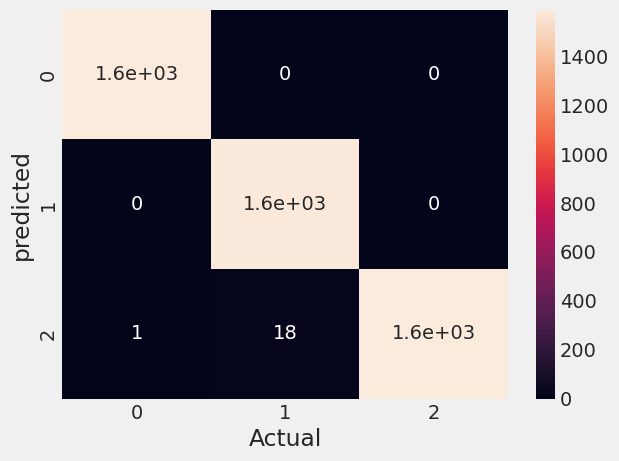

In [ ]:
cm=confusion_matrix(y_test,predrandom)
sb.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [ ]:
print(classification_report(y_test,predrandom))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      1589
     Neutral       0.99      1.00      0.99      1577
    Positive       1.00      0.99      0.99      1606

    accuracy                           1.00      4772
   macro avg       1.00      1.00      1.00      4772
weighted avg       1.00      1.00      1.00      4772



**Observations:**
Random forest model gets mean accuracy of 81.1

**4). AdaBoost classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ab=AdaBoostClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=2)
n_scores3=cross_val_score(ab,X_train,y_train,cv=cv,n_jobs=-1,error_score='raise')
results.append(n_scores3)

In [ ]:
print(mean(n_scores3))
print(std(n_scores3))

0.8032343117799792
0.008706856856875117


In [ ]:
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
predadaboost=ab.predict(X_test)

Text(21.78333333333333, 0.5, 'predicted')

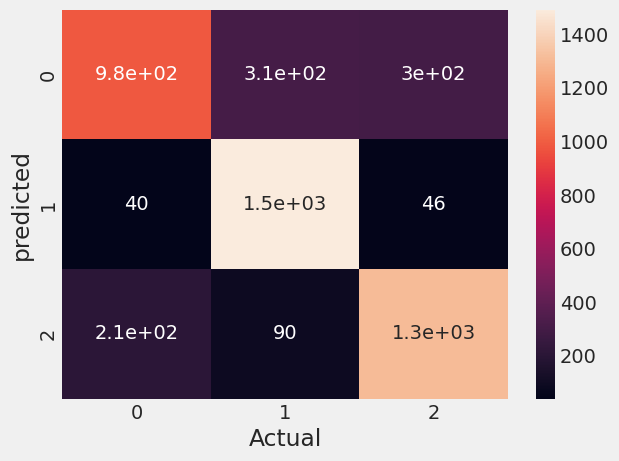

In [ ]:
cm=confusion_matrix(y_test,predadaboost)
sb.heatmap(cm,annot=True)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [ ]:
print(classification_report(y_test,predadaboost))

              precision    recall  f1-score   support

    Negative       0.80      0.62      0.70      1589
     Neutral       0.79      0.95      0.86      1577
    Positive       0.79      0.81      0.80      1606

    accuracy                           0.79      4772
   macro avg       0.79      0.79      0.79      4772
weighted avg       0.79      0.79      0.79      4772



**Observations:**

AdaBoost Model gets Training Accuracy of 82.9
while Testing Accuracy of 76.2

Out of 2000 oservations-
1599 were positive 
256 were negative and 
156 were neautral

###**Result** 
Among all the algorithms,Adaboost gives best result with respect to precision,recall, accuracy and f1_score 

# **GUI Starts**

In [ ]:
from tkinter import *
from tkinter import filedialog
from tkinter import messagebox
import pandas as pd
import joblib
from tkinter import Tk
import re

In [ ]:
model=rf
root=Tk()
root.title('Sentiment Analysis on the text provided by User')
lab=Label(root,text='Please Enter your Comments/Reviews',fg = "black",bg = "white",font = "Times")
lab.pack()
menubar = Menu(root, background='blue', fg='white')
e=Entry(root,width=50,font = "Helvetica 16 bold italic")
e.pack()

op=Label(root,text='',pady=50,font = "Verdana 18 bold",fg='green')
op.pack()

def sentimentpredict():
    reviews=e.get()
    reviews=re.sub('[^a-zA-Z]',' ',reviews)
    reviews=reviews.lower()
    
    reviewsvector=vect1.transform([reviews])
    prediction=model.predict(reviewsvector)
    if prediction=='Positive':
        op.configure(text='positive 😀')
    elif prediction=='Negative':
        op.configure(text='Negative 😫')
    elif prediction=='Neutral':
        op.configure(text='Neutral 😐')
        
b=Button(root,text='please click on predict',command=sentimentpredict,fg = "blue",bg = "white",font = "Verdana 10 bold")
b.pack()

root.mainloop()

##**Time series Forecasrting**

**Importing time series libraries**

In [ ]:
import datetime

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller,acf,pacf

**Converting the reviewtime column into Date time format**

In [ ]:
df_kindel_store_review['reviewTime']=df_kindel_store_review['reviewTime'].str.replace(',','')

In [ ]:
df_kindel_store_review['reviewTime'] = pd.to_datetime(df_kindel_store_review['reviewTime'], errors='coerce')


**Fetching the first 1 lakh observations from Kindle review data**

In [ ]:
df2=df_kindel_store_review[:100000]

**Merging Polarity,subjectivity,analysis labels and processed review text into main Kindle data frame**

In [ ]:
df4=df2.merge(df)

In [ ]:
df4

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year,Tags_Removed_text,polarity,subjectivity,Analysis_labels
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,2014-05-05,2014,enjoy vintag book movi enjoy read plot unusu d...,0.400000,0.500000,Positive
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,2014-01-06,2014,reissu old author born 1910 era say nero wolf ...,0.200000,0.150000,Positive
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,2014-04-04,2014,fairli interest old style terminologyi glad ge...,0.100000,0.616667,Positive
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,2014-02-19,2014,id never ami brewster mysteri hook,0.000000,0.000000,Neutral
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,2014-03-19,2014,period piec cloth lingo enjoy mysteri author g...,0.050000,0.450000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,A3SHXNTBJTNTPM,B003100U7Y,"Nina M. Reed ""DivaNina""","[0, 0]","Indigo Spell is a fairly quick, not unpleasant...",3.0,Not Bad,1403827200,2014-06-27,2014,indigo spell fairli quick unpleas your look st...,0.128846,0.474145,Positive
9996,A3TGY3ANGBNK7C,B003100U9M,"Cocktails and Books ""Shannon""","[0, 0]",4.5 CocktailsThis book is number five in the W...,5.0,Reviewed for Cocktails and Books,1385769600,2013-11-30,2013,45 cocktailsthi number five western wind seri ...,0.093822,0.410689,Positive
9997,A3RFI1BYI9LFVI,B003100U9M,"Crystal D. Anderson ""Crystal""","[0, 0]","I enjoyed the entire series of the Reapers, wo...",5.0,Enjoyed entire series,1390176000,2014-01-20,2014,enjoy entir seri reaper highli recommend found...,0.133333,0.300000,Positive
9998,AY19IPKCS98YG,B003100U9M,HeidiF,"[1, 1]",GREAT series. Very different and interesting. ...,5.0,Another good book!,1368316800,2013-05-12,2013,great seri differ interest enjoy book written ...,0.400000,0.416667,Positive


**Taking only reviewtime and polarity column for time series analysis**

In [ ]:
df5=df4[['reviewTime','polarity']]

In [ ]:
df5

,polarity
reviewTime,
2014-05-05,0.400000
2014-01-06,0.200000
2014-04-04,0.100000
2014-02-19,0.000000
2014-03-19,0.050000
...,...
2014-06-27,0.128846
2013-11-30,0.093822
2014-01-20,0.133333


###**Polarity of data over different Years**

<AxesSubplot:xlabel='reviewTime'>

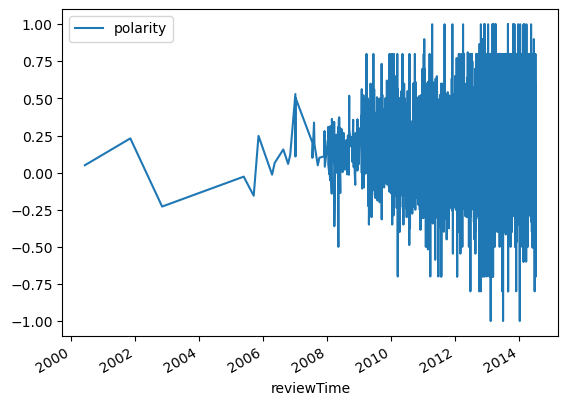

In [ ]:
df5.plot()

**Observations:**

We can see polarity is less or constant from 2000 to 2008 after that counts of reviews increased drasctically so we get this pattern 

In [ ]:
df5.sort_index(inplace=True)

In [ ]:
df5.index

DatetimeIndex(['2000-06-06', '2001-11-07', '2002-11-05', '2005-05-25',
               '2005-09-16', '2005-11-10', '2006-04-14', '2006-05-14',
               '2006-08-20', '2006-10-14',
               ...
               '2014-07-11', '2014-07-11', '2014-07-11', '2014-07-12',
               '2014-07-12', '2014-07-12', '2014-07-12', '2014-07-12',
               '2014-07-12', '2014-07-13'],
              dtype='datetime64[ns]', name='reviewTime', length=10000, freq=None)

Sorting index -Date time so that to get data in ascending date format

###**Checking the Seasonal Decomposition of Data over years**

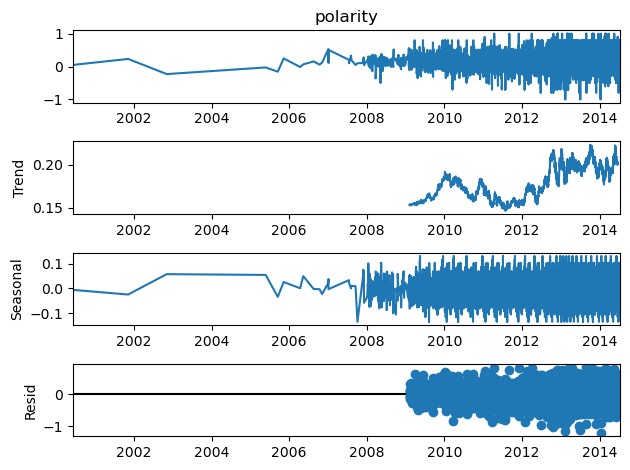

In [ ]:
result = seasonal_decompose(df5['polarity'], model='additive',period=365)
result.plot()
plt.show()

In [ ]:
df6=df5.loc['2008-07-11':]

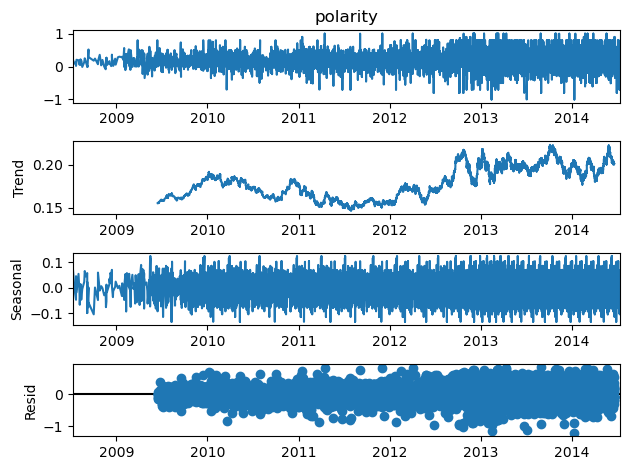

In [ ]:
result = seasonal_decompose(df6['polarity'], model='additive',period=365)
result.plot()
plt.show()

**Observation:**


*   While taking all data we can see there is a constant polarit over time 
*   But as we filter data from 2008 till 2014 we can see Trend ,seasonlaity and Resid is changing continously.




###**Checking stationery of Data**

In [ ]:
from statsmodels.tsa.stattools import adfuller
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    '''
    output:-> 
    1) test statistic, 
    2) p-value, 
    3) number of lags, 
    4) total observations
    
    '''
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [ ]:
# check the data for stationarity
ret=checkStationarity(df5); 
ret

'p-value=0.0. Data is stationary'

**Observations:**

While performing ADF test we can see p value is less than 0.5
so our Data is Staionery ,so we can proceed for model building

### **Triple exponential smoothing**

In [ ]:
# Simple Exponent - when there is no trend/seasonality
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [ ]:
model = ExponentialSmoothing(df5,trend='add',seasonal='add',seasonal_periods=365).fit() 

C:\Users\1784131\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Triple Exponent Smoothing')

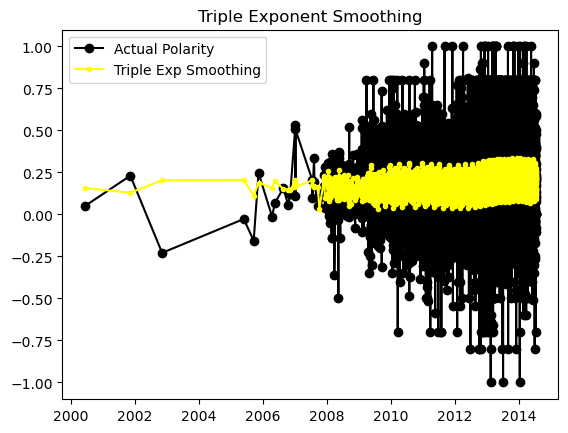

In [ ]:
#plot the actual and triple smoothing values
plt.plot(df5, marker='o',color='black',label='Actual Polarity')
plt.plot(model.fittedvalues,marker='.',color='yellow',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

Doing Triple smoothing technique to smooth our data 

**Installing libraries and pmdarima to do ARIMA model Analysis**

In [ ]:
!pip install pmdarima

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

**Plot ACF and PACF Plots**


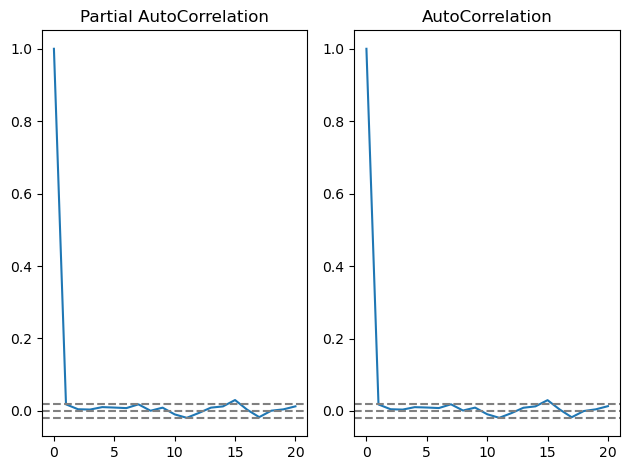

In [ ]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(df5, nlags=20)
lag_pacf = pacf(df5, nlags=20, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df5)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(df5)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df5)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(df5)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

# Plotting correlogram for ACF and PACF

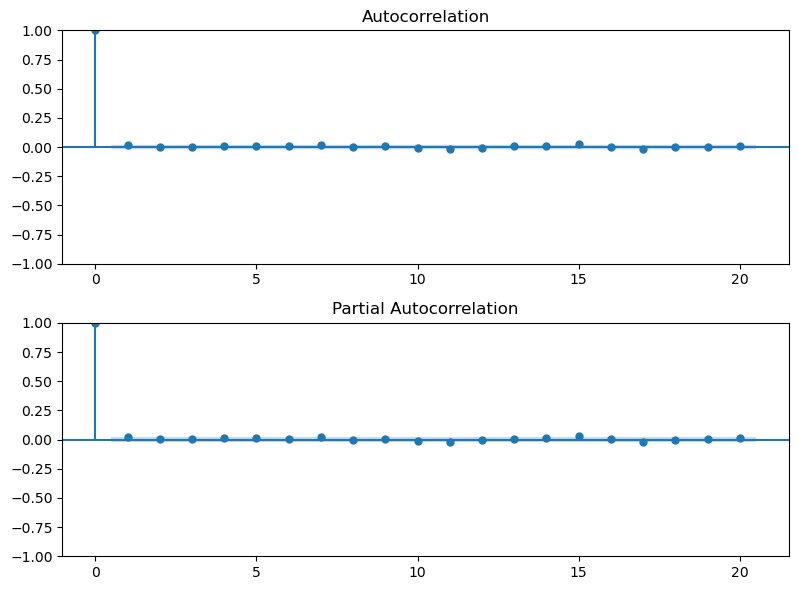

In [ ]:
fig = plt.figure(figsize=(8, 6))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df5, lags=20, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df5, lags=20, ax=ax2)

plt.tight_layout()

**Taking different values of p,q and d to check the best fit**

In [ ]:
# With p=3 and q=2
ar_m1 = ARIMA(df5, order = (3,0,2))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:               polarity   No. Observations:                10000
Model:                 ARIMA(3, 0, 2)   Log Likelihood                1159.104
Date:                Fri, 21 Apr 2023   AIC                          -2304.207
Time:                        13:18:30   BIC                          -2253.735
Sample:                             0   HQIC                         -2287.123
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1941      0.024      8.228      0.000       0.148       0.240
ar.L1          0.0256      0.055      0.469      0.639      -0.082       0.133
ar.L2          0.9855      0.053     18.663      0.0

In [ ]:
# With p=2 and q=2
ar_m1 = ARIMA(df5, order = (2,1,2))
r1 = ar_m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:               polarity   No. Observations:                10000
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1156.380
Date:                Fri, 21 Apr 2023   AIC                          -2302.761
Time:                        14:43:20   BIC                          -2266.709
Sample:                             0   HQIC                         -2290.557
                              - 10000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9384      0.332     -2.829      0.005      -1.589      -0.288
ar.L2          0.0132      0.010      1.352      0.176      -0.006       0.032
ma.L1         -0.0472      0.331     -0.142      0.8

**ARMA Model with p=2,q=2 is the best one**

**Split data into training and test**

Taking 70% data as training data and 30 % as testing data 
We will train our 70% data and will check how it works on ou testing 30 % data

In [ ]:
ss = int(0.7 * len(df5))

train = df5.iloc[:ss]
test = df5.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 7000, test = 3000


**Use test data to predict the Polarity using the Model**

In [ ]:
# predictions
start=len(train)
end=len(train)+len(test)
predictions = r1.predict(start-1,end-2)
print(predictions)

reviewTime
2013-06-18    0.198615
2013-06-18    0.203056
2013-06-18    0.197632
2013-06-18    0.202611
2013-06-18    0.200871
                ...   
2014-07-12    0.196956
2014-07-12    0.196736
2014-07-12    0.201484
2014-07-12    0.199744
2014-07-12    0.197772
Name: predicted_mean, Length: 3000, dtype: float64


**Converting reviewtime and polarity predictions into Dataframe**

In [ ]:
p1=pd.DataFrame(predictions)

**Resetting index of our dataframe**

In [ ]:
p1.reset_index(inplace=True)

In [ ]:
p1

,reviewTime,predicted_mean
0,2013-06-18,0.198615
1,2013-06-18,0.203056
2,2013-06-18,0.197632
3,2013-06-18,0.202611
4,2013-06-18,0.200871
...,...,...
2995,2014-07-12,0.196956
2996,2014-07-12,0.196736
2997,2014-07-12,0.201484
2998,2014-07-12,0.199744


**Making new dataframe for our test data**

In [ ]:
df6=test.reset_index()

In [ ]:
df6['pred']=p1['predicted_mean']

In [ ]:
df6

,reviewTime,polarity,pred
0,2013-06-18,0.026623,0.198615
1,2013-06-18,0.450000,0.203056
2,2013-06-18,0.221875,0.197632
3,2013-06-18,0.325000,0.202611
4,2013-06-18,0.000000,0.200871
...,...,...,...
2995,2014-07-12,0.268773,0.196956
2996,2014-07-12,0.301786,0.196736
2997,2014-07-12,0.000000,0.201484
2998,2014-07-12,0.216667,0.199744


**Calculating error by Subtrating actual with the predicted ones and dropping the null ones**

In [ ]:
df6['err'] = df6['pred'] - df6['polarity']

In [ ]:
df6.dropna(inplace=True)

**Plotting the error plot**

<AxesSubplot:>

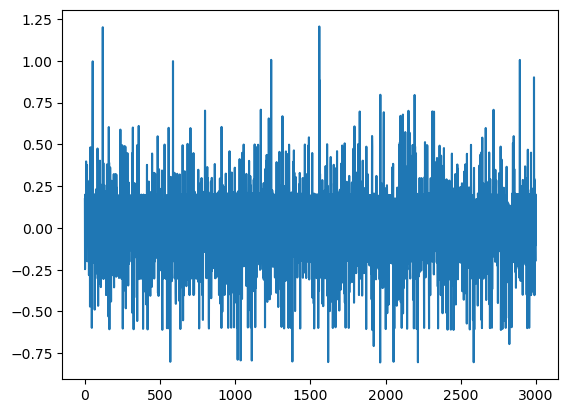

In [ ]:
df6.err.plot() 

### **Perform the LJung-Box test**

In [ ]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(r1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")
print(pvalue)

Fail-to-Reject H0. Good model
[0.97527249]


**Observations:**

Permorning the LJung Box test we see our p value is less than 0.5
so we reject the H0 null hypothesis
and We see our model is good

### **Calculate MSE and RMSE of the Model from the test**

In [ ]:
p=2
q=2

In [ ]:
# MSE
msg = 'ARMA Model. Order=(' + str(p) + ',' + str(q) + ')'
mse1 = mean_squared_error(df6.polarity, df6.pred)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(2,2)
	MSE = 0.05535075370572563
	RMSE = 0.23526740893231607


**Observation:**

Our models mean squaed error is 5.5  that is less and thats what we need

### **Forecasting the future values**


In [ ]:
frst = r1.predict(start=len(df5), end=len(df5)+500)
frst

10000    0.203222
10001    0.198607
10002    0.200458
10003    0.198660
10004    0.200372
           ...   
10496    0.199537
10497    0.199537
10498    0.199537
10499    0.199537
10500    0.199537
Name: predicted_mean, Length: 501, dtype: float64

**Plotting the actual and predicted polarity** 

<AxesSubplot:xlabel='reviewTime'>

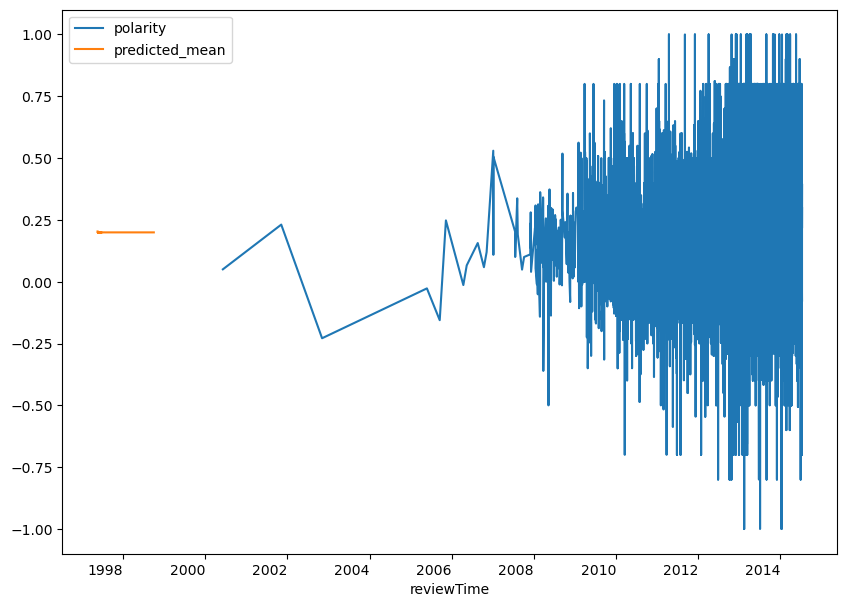

In [ ]:
df5.plot(figsize=(10,8),legend=True)
frst.plot(legend=True,)

## **Un-Supervised Machine Learning -Clustering**

In [ ]:
df4.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,year,Tags_Removed_text,polarity,subjectivity,Analysis_labels
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,2014-05-05,2014,enjoy vintag book movi enjoy read plot unusu d...,0.40,0.500000,Positive
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,2014-01-06,2014,reissu old author born 1910 era say nero wolf ...,0.20,0.150000,Positive
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,2014-04-04,2014,fairli interest old style terminologyi glad ge...,0.10,0.616667,Positive
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,2014-02-19,2014,id never ami brewster mysteri hook,0.00,0.000000,Neutral
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,2014-03-19,2014,period piec cloth lingo enjoy mysteri author g...,0.05,0.450000,Positive


In [ ]:
df_cluster=df4[['overall','polarity','subjectivity','Analysis_labels']]

In [ ]:
df_cluster.head()

,overall,polarity,subjectivity,Analysis_labels
0,5.0,0.40,0.500000,Positive
1,4.0,0.20,0.150000,Positive
2,4.0,0.10,0.616667,Positive
3,5.0,0.00,0.000000,Neutral
4,4.0,0.05,0.450000,Positive


###**Label Encoding:**

Used to transform non-numerical label-Analysis to numerical label

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df_cluster['analysis']=l.fit_transform(df_cluster['Analysis_labels'])

In [ ]:
df_cluster1=df_cluster.drop(['Analysis_labels'],axis=1)

In [ ]:
df_cluster1

,overall,polarity,subjectivity,analysis
0,5.0,0.400000,0.500000,2
1,4.0,0.200000,0.150000,2
2,4.0,0.100000,0.616667,2
3,5.0,0.000000,0.000000,1
4,4.0,0.050000,0.450000,2
...,...,...,...,...
9995,3.0,0.128846,0.474145,2
9996,5.0,0.093822,0.410689,2
9997,5.0,0.133333,0.300000,2
9998,5.0,0.400000,0.416667,2


**Checking for null values**

In [ ]:
df_cluster1.isna().sum()

overall         0
polarity        0
subjectivity    0
analysis        0
dtype: int64

##**Kmeans -Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(df_cluster1)

KMeans(n_clusters=3, random_state=1)

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=1)
kmeans.fit(df_cluster1)
label1 = kmeans.labels_
silhouette_score(df_cluster1,label1,metric = 'euclidean')

0.555507206088927

In [ ]:
df_cluster1['kmeans']=label1

###**Plotting the overall vs Analysis graph**

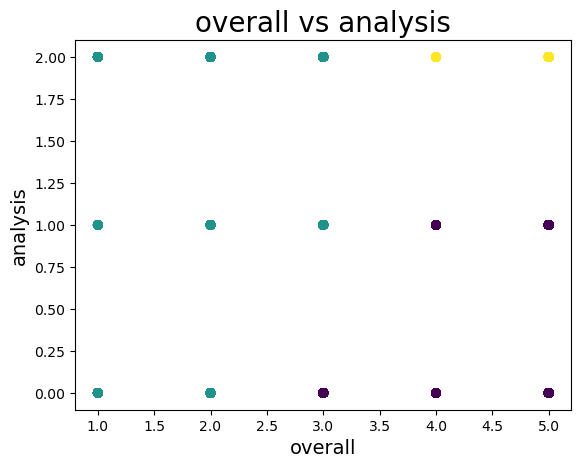

In [ ]:
plt.scatter(x=df_cluster1['overall'],y=df_cluster1['analysis'],c=df_cluster1['kmeans'])
plt.title('overall vs analysis',fontsize=20)
plt.xlabel('overall',fontsize=14)
plt.ylabel('analysis',fontsize=14)
plt.show()

###**Plotting the Overall vs Analysis Graph**

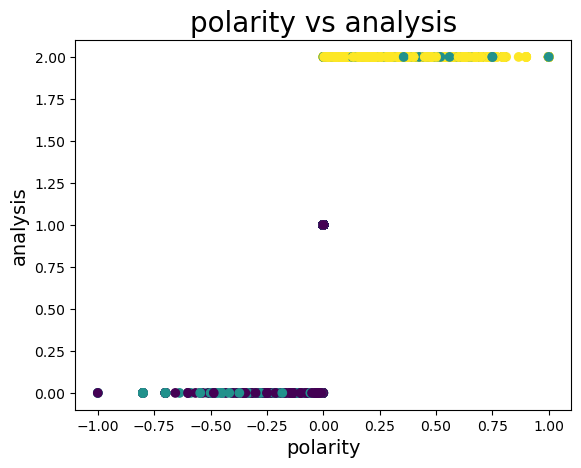

In [ ]:
plt.scatter(x=df_cluster1['polarity'],y=df_cluster1['analysis'],c=df_cluster1['kmeans'])
plt.title('polarity vs analysis',fontsize=20)
plt.xlabel('polarity',fontsize=14)
plt.ylabel('analysis',fontsize=14)
plt.show()

**Oservations:**

Yellow=Positive polarity 

Green=Neutral polarity

DarK_blue=negative polarity

###**Plotting the Elbow Curve** 

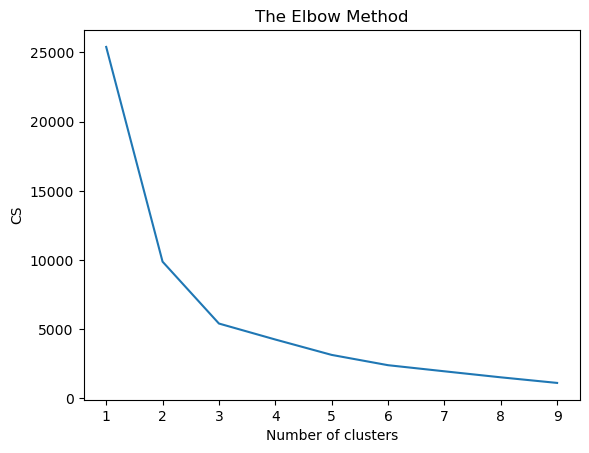

In [ ]:
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_cluster1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Observations: In elbow diagram, we can observe that clusters 3 forms good one compared to al other K values

    -> Polarity <0  means whose reviews are negative Forms one cluster that product seems to be bad
    
    -> Polarity =0  means whose reviews are neutral Forms one cluster that product needs to be improved
    
    -> Polarity >0  means whose reviews are positive Forms one cluster that product seems to be good